### Raw data analysis, extracting data from the monoenergetic TL-208 Double Escape Peak

In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [2]:
pulses = pickle.load(open('/Users/nzaretski/Desktop/gerda/project_git/data_old.pkl','rb'))

Text(0.5, 0, 'time')

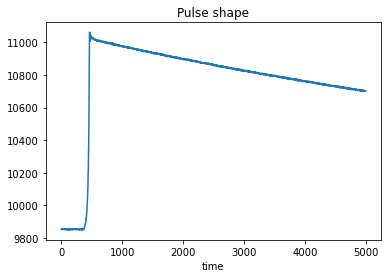

In [3]:
plt.plot(pulses[0])
plt.title('Pulse shape')
plt.xlabel('time')

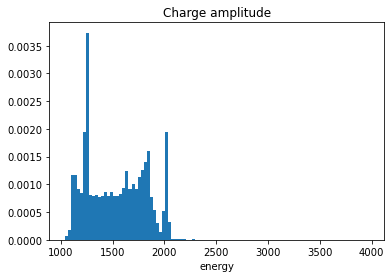

In [4]:
plt.hist(np.max(pulses, axis = 1) - np.min(pulses, axis = 1), bins = 100, density=True)
plt.title('Charge amplitude')
plt.xlabel('energy')
plt.show()

#### The "monoenergetic" Double Escape Peak pulses are chosen

In [5]:
pulses = pulses[np.max(pulses, axis = 1) - np.min(pulses, axis = 1) > 1200]
pulses = pulses[np.max(pulses, axis = 1) - np.min(pulses, axis = 1) < 1300]
pulses = pulses.astype(float)

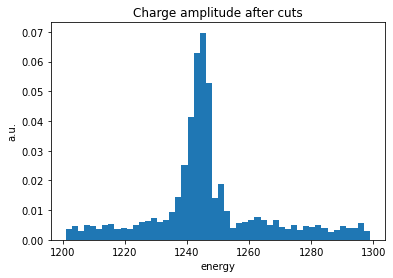

In [6]:
plt.hist(np.max(pulses, axis = 1) - np.min(pulses, axis = 1), bins = 50, density=True)
plt.title('Charge amplitude after cuts')
plt.ylabel('a.u.')
plt.xlabel('energy')
plt.show()

### Search for outliers

In [7]:
index_of_max = []
for pulse in pulses:
    index_of_max.append(list(pulse).index(max(pulse)))
index_of_max = np.array(index_of_max)

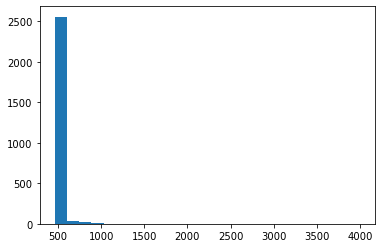

In [8]:
_, _, _ = plt.hist(index_of_max, bins=25)

In [9]:
outliers = pulses[index_of_max > 1000]
pulses = pulses[index_of_max <= 1000] 

In [10]:
print(outliers.shape)

(1, 5000)


Text(0.5, 0, 'time')

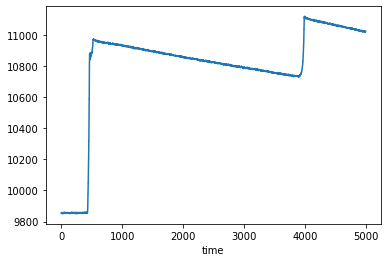

In [11]:
plt.plot(outliers[0])
plt.xlabel('time')

In [12]:
print(pulses.shape)

(2619, 5000)


In [13]:
pickle.dump(pulses, open('data.pkl','wb'))